Importing the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection,Analysis and Preprocessing

In [3]:
mart_data=pd.read_csv('Train.csv')

In [4]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
mart_data.shape

(8523, 12)

In [6]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values

1.Mean value->Imputation->Item_Weight

2.Mode value->Outlet_Size

In [8]:
mart_data['Item_Weight'].mean()

12.857645184136183

In [9]:
#filling the missing values in 'Item_Weight' column with 'Mean' value
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(), inplace=True)

In [10]:
#replacing missing values in 'Outlet_Size' with 'Mode' value
mode_val=mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [11]:
print(mode_val)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values=mart_data['Outlet_Size'].isnull()

In [13]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [29]:
mart_data.loc[missing_values,'Outlet_Size']=mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_val[x])

In [30]:
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


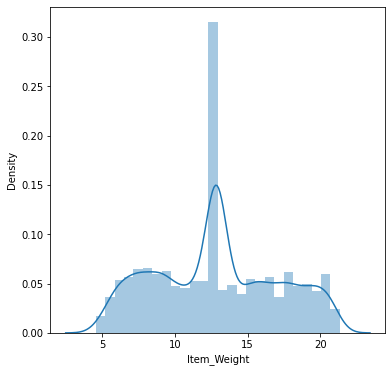

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(mart_data['Item_Weight'])
plt.show()

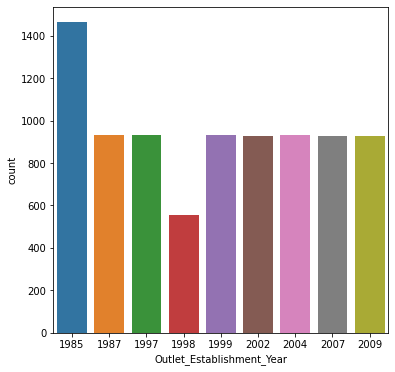

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=mart_data)
plt.show()

In [33]:
mart_data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [35]:
mart_data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [36]:
encoder=LabelEncoder()

In [37]:
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data['Item_Identifier'])

mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data['Item_Fat_Content'])

mart_data['Item_Type'] = encoder.fit_transform(mart_data['Item_Type'])

mart_data['Outlet_Identifier'] = encoder.fit_transform(mart_data['Outlet_Identifier'])

mart_data['Outlet_Size'] = encoder.fit_transform(mart_data['Outlet_Size'])

mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data['Outlet_Location_Type'])

mart_data['Outlet_Type'] = encoder.fit_transform(mart_data['Outlet_Type'])

In [38]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Separating Features and Label

In [39]:
X=mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y=mart_data['Item_Outlet_Sales']
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

Splitting the data into Training and Testing data

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Training

In [44]:
model=XGBRegressor()

In [45]:
model.fit(X_train,Y_train)

[09:12:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Model Evaluation

In [46]:
training_data_prediction=model.predict(X_train)

In [48]:
#R squared error
r2_error=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error:',r2_error)

R squared error: 0.6364457030941357


In [50]:
test_data_prediction=model.predict(X_test)

In [51]:
#R squared error
r3_error=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',r3_error)

R squared error: 0.5867640914432671
